In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def warmup_learning_rate(step, warmup_steps, initial_learning_rate, target_warmup):
    completed_fraction = step / warmup_steps
    total_delta = target_warmup - initial_learning_rate
    return completed_fraction * total_delta

def decayed_learning_rate(step, decay_steps, initial_decay_lr, alpha):
    step = min(step, decay_steps)
    cosine_decay = 0.5 * (1 + np.cos(np.pi * step / decay_steps))
    decayed = (1 - alpha) * cosine_decay + alpha
    return initial_decay_lr * decayed

def cosine_learning(n_epochs, warmup_steps, initial_learning_rate, target_warmup, decay_steps, alpha):
    epochs = np.arange(1,n_epochs+1)
    lr = [warmup_learning_rate(epoch, warmup_steps, initial_learning_rate, target_warmup) for epoch in epochs[:warmup_steps]]
    if target_warmup is None:
        initial_decay_lr = initial_learning_rate
    else:
        initial_decay_lr = target_warmup
    for epoch in epochs[warmup_steps:]:
        lr.append(decayed_learning_rate(epoch, decay_steps, initial_decay_lr, alpha))
    return epochs, lr

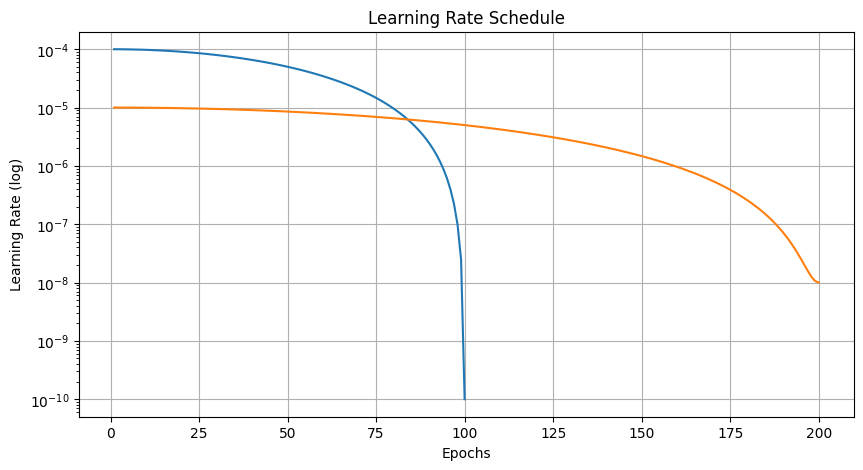

In [47]:
N_epochs = 100
target_warmup = None
warmup_steps=0
initial_learning_rate = 1e-4
decay_steps = N_epochs - warmup_steps
alpha = 1e-6
epochs0, lr0 = cosine_learning(N_epochs, warmup_steps, initial_learning_rate, target_warmup, decay_steps, alpha)

N_epochs = 200
target_warmup = None
warmup_steps=0
initial_learning_rate = 1e-5
decay_steps = N_epochs - warmup_steps
alpha = 1e-3
epochs1, lr1 = cosine_learning(N_epochs, warmup_steps, initial_learning_rate, target_warmup, decay_steps, alpha)

fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(epochs0, lr0)
ax.plot(epochs1, lr1)
ax.set_yscale('log')
ax.set_xlabel('Epochs')
ax.set_ylabel('Learning Rate (log)')
ax.set_title('Learning Rate Schedule')
ax.grid()
plt.show()

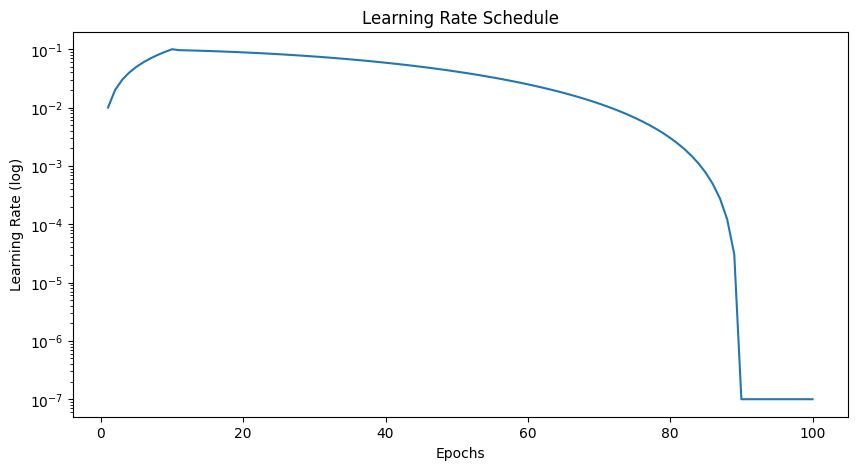

In [21]:
epochs = np.arange(1,101)
initial_learning_rate = 0
target_warmup = 0.1
warmup_steps=10

lr = [warmup_learning_rate(epoch, warmup_steps, initial_learning_rate, target_warmup) for epoch in epochs[:warmup_steps]]

decay_steps = len(epochs) - warmup_steps
alpha = 1e-6

for epoch in epochs[warmup_steps:]:
    lr.append(decayed_learning_rate(epoch, decay_steps, alpha))

fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(epochs, lr)
ax.set_yscale('log')
ax.set_xlabel('Epochs')
ax.set_ylabel('Learning Rate (log)')
ax.set_title('Learning Rate Schedule')
plt.show()